# Plotting Sigmoid Function 

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# $S_{w,b}(x) = \frac{1}{1+e^{-(wx+b)}}$

In [29]:
def sigmoid(x,w,b):
    return 1/(1 + np.exp(-(w*x + b)))

In [30]:
sigmoid(1, 0.5, 0)

0.6224593312018546

In [31]:
w = 0.9
b = 0.1
X = np.linspace(-10,10,100)#linspace givese linearly spaced numbers between first two parameters and gives the equivalent of the third parameter in count
Y = sigmoid(X, w, b)

In [32]:
type(Y) # now Y is an array

numpy.ndarray

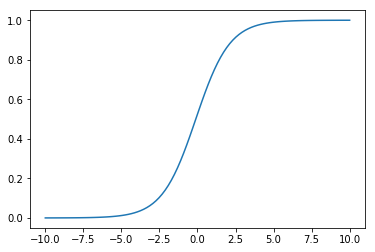

In [33]:
plt.plot(X,Y)
plt.show()#you can change the vakue of w and b and see the change in the graph below # slider available in google colab as a code snipet 
#just type #@param {type: "slider", min: -2, max: 2, step: 0.1}

In [34]:
#b changes the shift, w changes the rate of drop ie, slope

$S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1+e^(-(w_1x_1+w_2x_2 + b))}$

In [35]:
def sigmoid_2d(x1, x2, w1, w2,b):
    return 1/(1 + np.exp(-(w1*x1+ w2*x2 + b)))    

In [36]:
sigmoid_2d(2,1,2,1,0.5)

0.995929862284104

In [37]:
#https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [38]:
import mpl_toolkits.mplot3d

In [39]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1,X2)# grid used when every combination needs to be considered else it would have a combination linearly only

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [40]:
w1 = 5 # if w is negative the slope would be other way, if w 1 is less so the transition along the x axis is wider, if a line is passed parallel to the x axis
w2 = -1 # if w2 is more so the transition along the y axis is narrower, if a line is passed parrallel to y axis
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

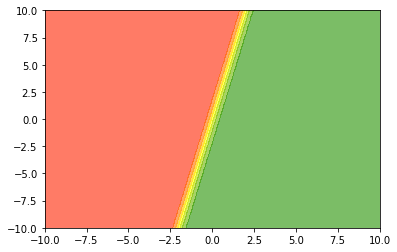

In [41]:
import matplotlib.colors
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
plt.contourf(XX1,XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

In [42]:
#blue is zero, yellow is one

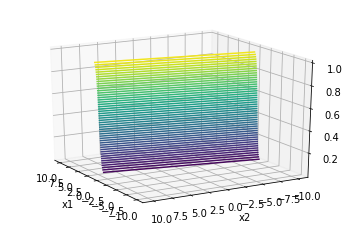

In [43]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1, XX2, Y, 50, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(20,150)

# Compute loss for a given dataset

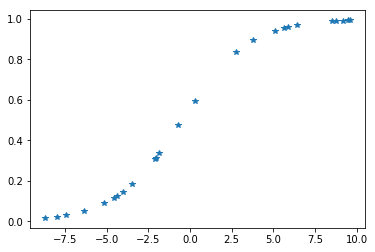

In [44]:
#random.random generates numbers between -1 and +1
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

plt.plot(X,Y, '*')
plt.show()

In [45]:
#w can be any real number
def calculate_loss(X, Y, w_est, b_est):
    loss = 0
    for x, y in zip(X, Y):
        loss += (y - sigmoid(x, w_est, b_est))**2
    return loss

In [46]:
W = np.linspace(0,2,100)
B = np.linspace(0,2,100)

WW,BB = np.meshgrid(W,B)

Loss = np.zeros(WW.shape)

In [47]:
WW.shape

(100, 100)

In [48]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i,j] = calculate_loss(X,Y,WW[i,j], BB[i,j])

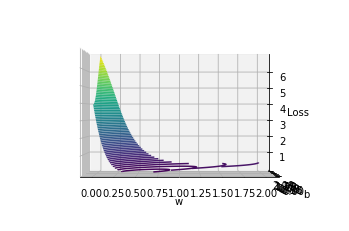

In [49]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(WW, BB, Loss,80, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(0, 270)

In [50]:
# we need to find out the w,b for which the loss is minimum

In [51]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i*Loss.shape[1])

In [52]:
print(i,j)

13 25


In [53]:
print(WW[i,j], BB[i,j])

0.5050505050505051 0.26262626262626265


In [54]:
# the above graph is between, w,b and loss(z axis), before this it was x1,x2 and Y)output on z axis)

# Class for sigmoid neuron

In [55]:
class SigmoidNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b #T is transpose
    
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)*x
    
    def grad_b(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
    
    def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise = True):
        #initialise w,b
        if initialise:
            self.w = np.random.randn(1, X.shape[1]) # number of columns in X(input) would be the no of columns in self.w
            self.b = 0

        for i in range(epochs):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)
                
            self.w -= learning_rate * dw
            self.b -= learning_rate * db

# Fit for toy data

In [70]:
X = np.asarray([[2.5,2.5], [4,-1], [1,-4], [-3,1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [71]:
import numpy as np

In [72]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [73]:
def plot_sn(X, Y, sn):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))
    plt.contourf(XX1, XX2, YY, cmap = my_cmap, alpha = 0.6)
    plt.scatter(X[:,0], X[:,1], c = Y)
    plt.plot()

[[ 1.20058898 -1.22398117]] [0.05946164]
[[ 1.41891346 -0.94376989]] [0.09083204]
[[ 1.60753385 -0.61523769]] [0.0371964]
[[ 1.67143384 -0.53974651]] [-0.01127819]
[[ 1.69162503 -0.5802222 ]] [-0.05551662]
[[ 1.72312819 -0.57941727]] [-0.09533589]
[[ 1.74857187 -0.59010267]] [-0.13224531]
[[ 1.77326682 -0.59746315]] [-0.16641899]
[[ 1.79629542 -0.6048402 ]] [-0.19822807]
[[ 1.81801082 -0.61173506]] [-0.22793193]
[[ 1.83853268 -0.61825559]] [-0.25576032]
[[ 1.85798374 -0.62443525]] [-0.28190915]
[[ 1.87646843 -0.63030695]] [-0.30654724]
[[ 1.89407731 -0.63589921]] [-0.32982077]
[[ 1.91088922 -0.64123696]] [-0.35185697]
[[ 1.9269732  -0.64634209]] [-0.37276707]
[[ 1.94238994 -0.65123388]] [-0.39264878]
[[ 1.95719306 -0.65592941]] [-0.41158831]
[[ 1.97143011 -0.66044383]] [-0.429662]
[[ 1.98514345 -0.66479068]] [-0.44693776]


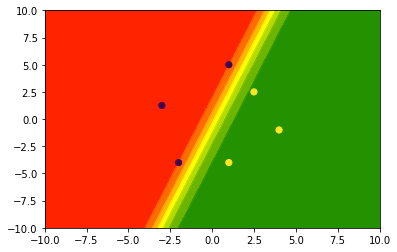

In [74]:
sn.fit(X, Y, 1, 0.5, True)
for i in range(20):
    print(sn.w, sn.b)
    plot_sn(X, Y, sn)
    sn.fit(X, Y, 1, 0.5, False)

In [75]:
#trying to separate the plots using subplots, so as to display the change in the learning of algo, without overwriting them
def plot_sn(X, Y, sn, ax):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1, XX2, YY, cmap = my_cmap, alpha = 0.6)
    ax.scatter(X[:,0], X[:,1], c = Y, cmap = my_cmap)
    ax.plot()

[[0.76104829 1.08795321]] [-0.00173949]
[[0.88641732 0.98946343]] [-0.01214403]
[[0.95975693 0.88102869]] [-0.00604355]
[[1.01948511 0.73469908]] [0.0146572]
[[1.08183781 0.50976348]] [0.05486662]
[[1.15189913 0.15705821]] [0.11406541]
[[ 1.15323566 -0.21676938]] [0.10670435]
[[ 1.13368427 -0.49856705]] [0.02968398]
[[ 1.25456878 -0.34344886]] [-0.02965991]
[[ 1.2658995  -0.47930048]] [-0.0895971]
[[ 1.33932857 -0.41762364]] [-0.137788]
[[ 1.36669002 -0.47371758]] [-0.18395612]
[[ 1.41266323 -0.4649414 ]] [-0.22398293]
[[ 1.44538684 -0.48490661]] [-0.2613367]
[[ 1.47968082 -0.49251532]] [-0.29531537]
[[ 1.51049819 -0.50321189]] [-0.32679084]
[[ 1.53975511 -0.51231772]] [-0.35593567]
[[ 1.56724552 -0.52108721]] [-0.38305938]
[[ 1.59322936 -0.52934515]] [-0.40838367]
[[ 1.61784783 -0.53717312]] [-0.43210529]


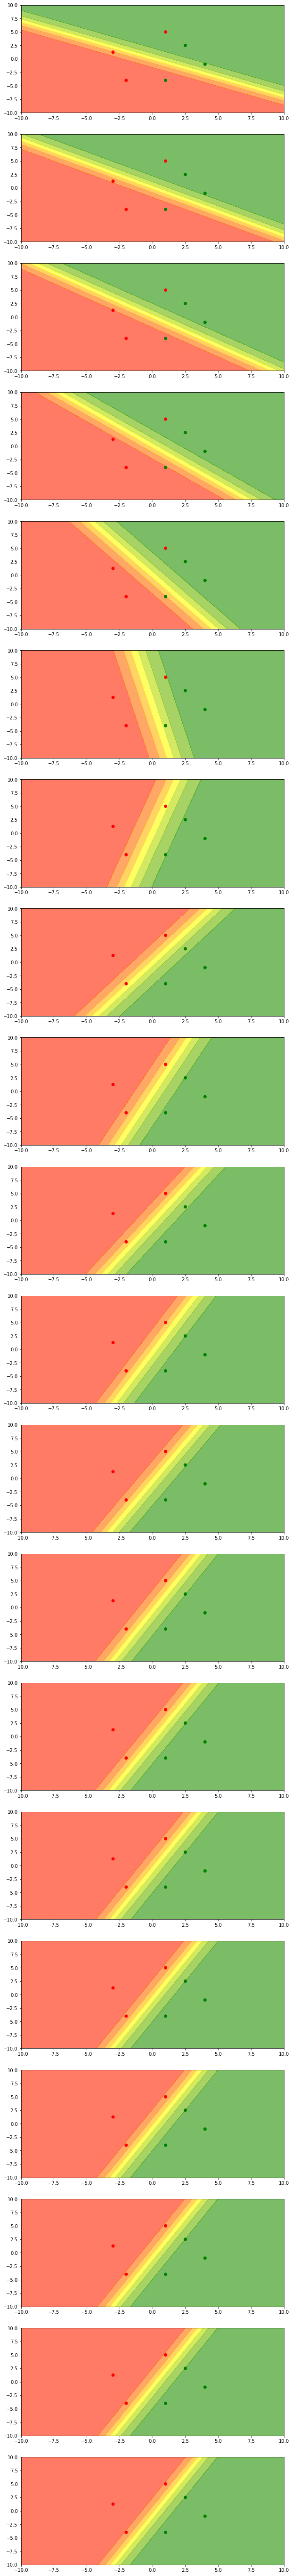

In [80]:

sn.fit(X, Y, 1, 0.5, True)
N = 20
plt.figure(figsize = (10, N*5))
for i in range(N):
    print(sn.w, sn.b)
    ax = plt.subplot(N, 1, i + 1)
    plot_sn(X, Y, sn, ax)
    sn.fit(X, Y, 1, 0.5, False)